In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Define dataset path
dataset_path = r"C:/Users/ACER/Desktop/New diseas dection/dataset"


# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values between 0 and 1
    rotation_range=20,            # Randomly rotate images
    zoom_range=0.2,               # Random zoom
    shear_range=0.2,              # Shearing
    horizontal_flip=True,         # Flip images horizontally
    validation_split=0.2          # Split data into training and validation sets
)

# Prepare train and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),       # Resize all images to 150x150
    batch_size=32,                # Number of images per batch
    class_mode='binary',          # Binary classification
    subset='training'             # Training data subset
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'           # Validation data subset
)


Found 820 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


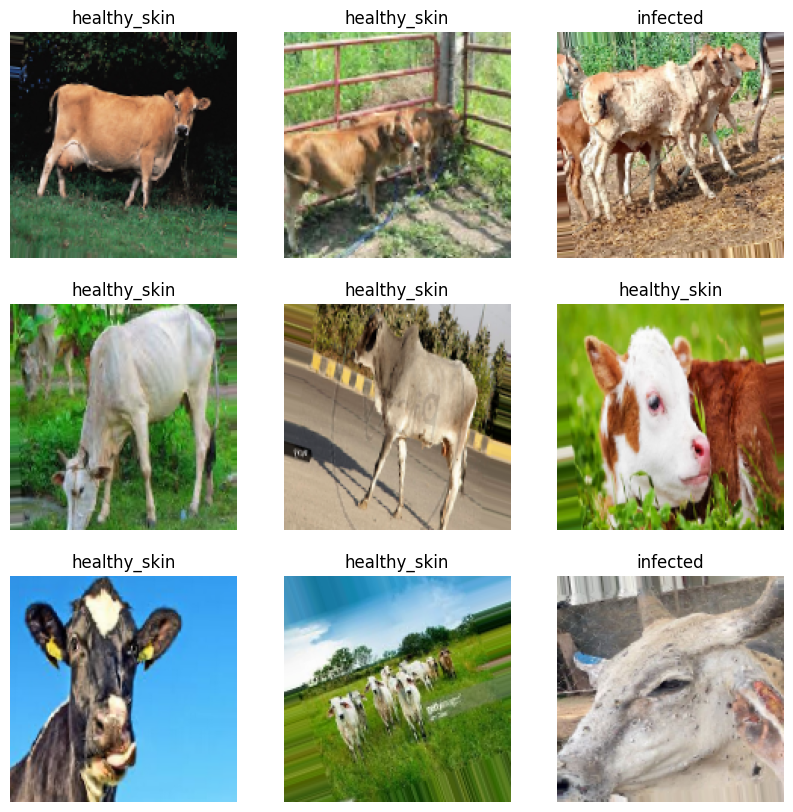

In [3]:
# Display a few sample images from the training data
class_names = ['healthy_skin', 'infected']

def display_sample_images(data):
    images, labels = next(data)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()

display_sample_images(train_data)


In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # First Conv Layer
    MaxPooling2D(2, 2),                                                # First MaxPooling Layer
    Conv2D(64, (3, 3), activation='relu'),                             # Second Conv Layer
    MaxPooling2D(2, 2),                                                # Second MaxPooling Layer
    Flatten(),                                                         # Flattening Layer
    Dense(128, activation='relu'),                                     # Fully Connected Layer
    Dropout(0.5),                                                      # Dropout for regularization
    Dense(1, activation='sigmoid')                                     # Output Layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,                      # Number of epochs
    steps_per_epoch=len(train_data),    # Steps per epoch
    validation_steps=len(val_data)      # Validation steps
)


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6090 - loss: 1.5163 - val_accuracy: 0.6863 - val_loss: 0.5125
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 535ms/step - accuracy: 0.6976 - loss: 0.5161 - val_accuracy: 0.7549 - val_loss: 0.4936
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.7849 - loss: 0.4650 - val_accuracy: 0.7500 - val_loss: 0.4595
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - accuracy: 0.7430 - loss: 0.4778 - val_accuracy: 0.7451 - val_loss: 0.5360
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.7981 - loss: 0.4388 - val_accuracy: 0.8235 - val_loss: 0.4378
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 508ms/step - accuracy: 0.7927 - loss: 0.4609 - val_accuracy: 0.7892 - val_loss: 0.4625
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - accuracy: 0.7989 - loss: 0.4272 - val_accuracy: 0.7990 - val_loss: 0.4154
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.7954 - loss: 0.4328 - val_accurac

In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,                      # Number of epochs
    steps_per_epoch=len(train_data),    # Steps per epoch
    validation_steps=len(val_data)      # Validation steps
)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 472ms/step - accuracy: 0.8189 - loss: 0.3851 - val_accuracy: 0.8235 - val_loss: 0.3738
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 544ms/step - accuracy: 0.8102 - loss: 0.4227 - val_accuracy: 0.8235 - val_loss: 0.3998
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.8261 - loss: 0.3902 - val_accuracy: 0.8039 - val_loss: 0.4165
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.8404 - loss: 0.3768 - val_accuracy: 0.8333 - val_loss: 0.4372
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 406ms/step - accuracy: 0.8232 - loss: 0.3791 - val_accuracy: 0.8186 - val_loss: 0.3620
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - accuracy: 0.8351 - loss: 0.3737 - val_accuracy: 0.7745 - val_loss: 0.4528
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 415ms/step - accuracy: 0.8193 - loss: 0.4046 - val_accuracy: 0.8186 - val_loss: 0.3853
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.7926 - loss: 0.4424 - val_accu

In [7]:
# Save the trained model
model.save('lumpy_skin_detection_model.h5')
print("Model saved as 'lumpy_skin_detection_model.h5'")


Model saved as 'lumpy_skin_detection_model.h5'


In [8]:
# Evaluate model performance
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.8425 - loss: 0.4465
Validation Accuracy: 85.29%
Validation Loss: 0.37


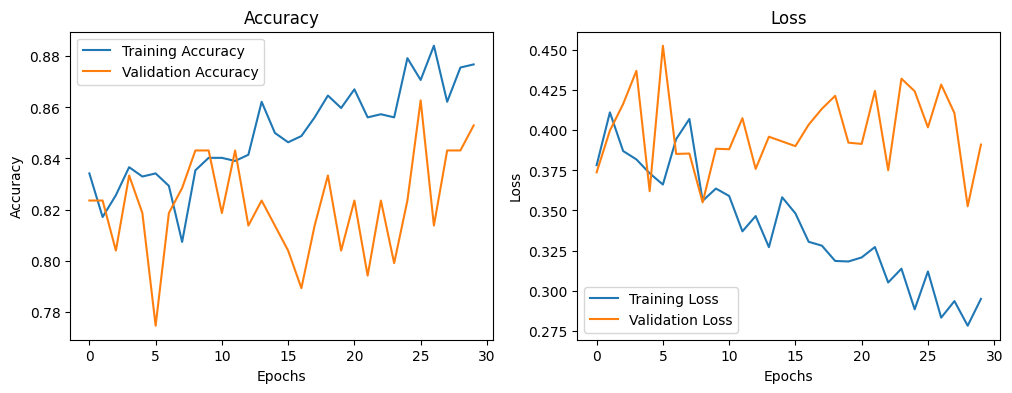

In [9]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to predict LSD in a single image
def predict_lsd(image_path, model):
    img = load_img(image_path, target_size=(150, 150))  # Load and resize image
    img_array = img_to_array(img) / 255.0              # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Lumpy Detected"
    else:
        return "No Lumpy Detected"

# Test the model with a new image
test_image_path = "new_images/cow_image1.jpg"
result = predict_lsd(test_image_path, model)
print(f"Result: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Result: Lumpy Detected
